In [1]:
import pandas, statsmodels.api as sm

import matplotlib.pyplot as plt

import seaborn as sns, numpy as np

sns.set_style("whitegrid")

In [2]:
url = "/content/jantung.csv"

reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

origin = reader(url)

origin.iloc[:5, :6]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS
0,40,M,ATA,140,289,0
1,49,F,NAP,160,180,0
2,37,M,ATA,130,283,0
3,48,F,ASY,138,214,0
4,54,M,NAP,150,195,0


In [3]:
origin.iloc[:5, 6:]

,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Normal,172,N,0.0,Up,0
1,Normal,156,N,1.0,Flat,1
2,ST,98,N,0.0,Up,0
3,Normal,108,Y,1.5,Flat,1
4,Normal,122,N,0.0,Up,0


In [4]:
null = origin.isnull().sum()

null.sum()

0

In [5]:
double = origin.duplicated()

double.sum()

0

In [6]:
tabler = origin.copy()

tabler.iloc[:5, :5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol
0,40,M,ATA,140,289
1,49,F,NAP,160,180
2,37,M,ATA,130,283
3,48,F,ASY,138,214
4,54,M,NAP,150,195


In [7]:
tacol = tabler.select_dtypes("object").columns.tolist()

tacol

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

labeler = LabelEncoder()

for col in tacol:
  # Label Encoder on Categorical Column
  tabler[col] = labeler.fit_transform(tabler[col])

tabler[tacol].iloc[:5]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [9]:
integer = [i for i in tabler.columns if i not in tacol]

integer = integer[:6]

integer

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [10]:
import warnings; warnings.filterwarnings("ignore")

def coplot(columns):
  # Normal Distribution Plot
  cate, (distaxes, plotaxes) = plt.subplots(1, 2, figsize=(10, 5))

  sns.distplot(x=columns, ax=distaxes)
  distaxes.set_title("Column Distribution")

  sm.qqplot(np.sort(columns), line='s', ax=plotaxes)
  plotaxes.set_title("Normal Probability Plot")

  plt.tight_layout();

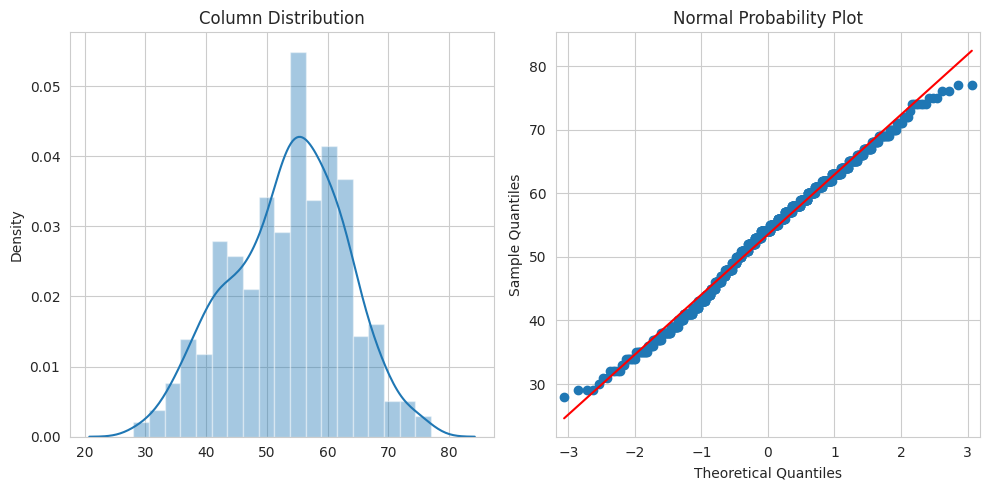

In [11]:
# 1

coplot(tabler["Age"])

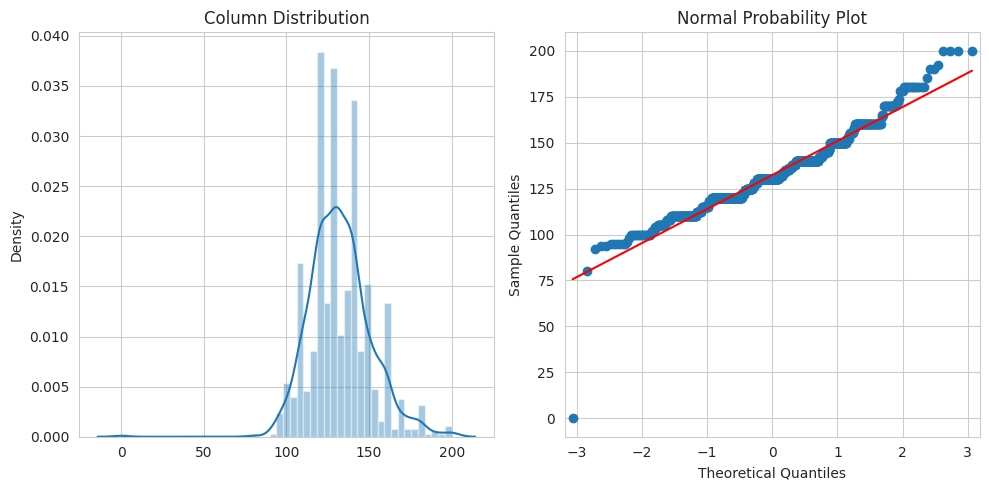

In [12]:
# 1

coplot(tabler["RestingBP"])

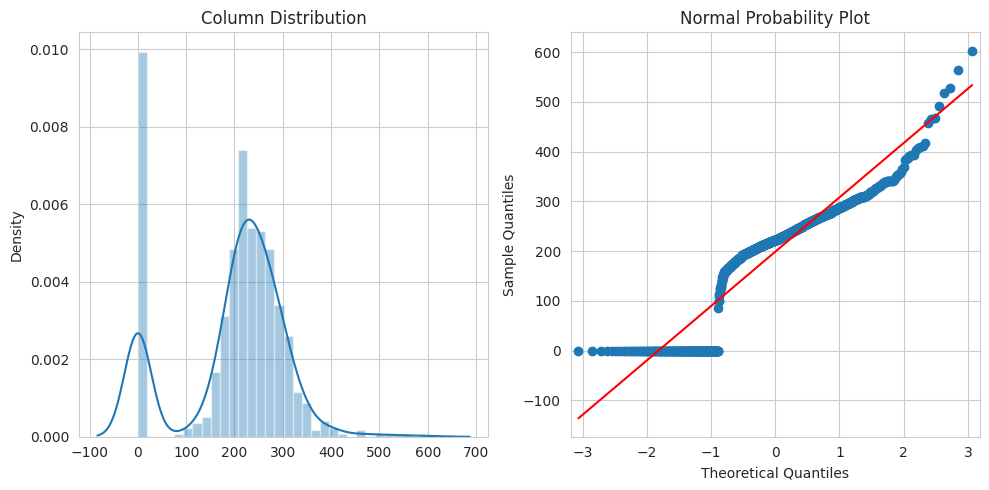

In [13]:
# 0

coplot(tabler["Cholesterol"])

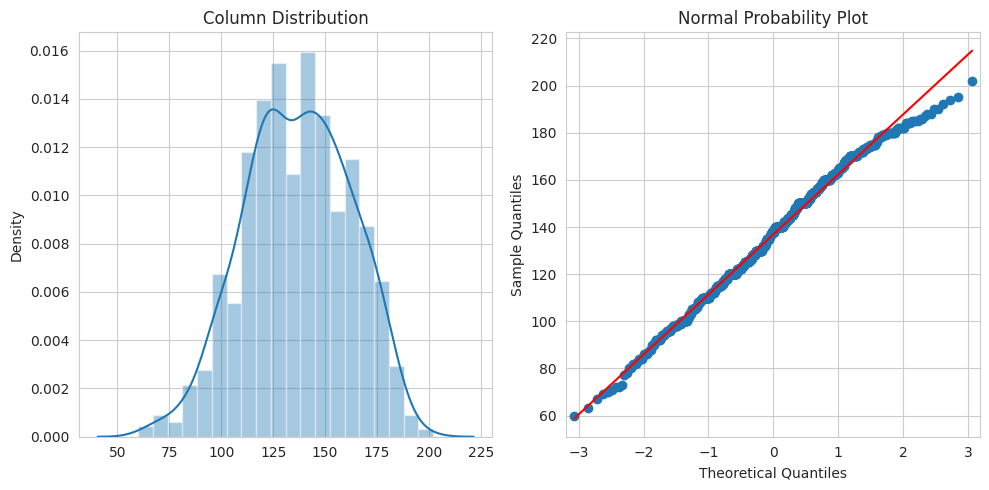

In [14]:
# `

coplot(tabler["MaxHR"])

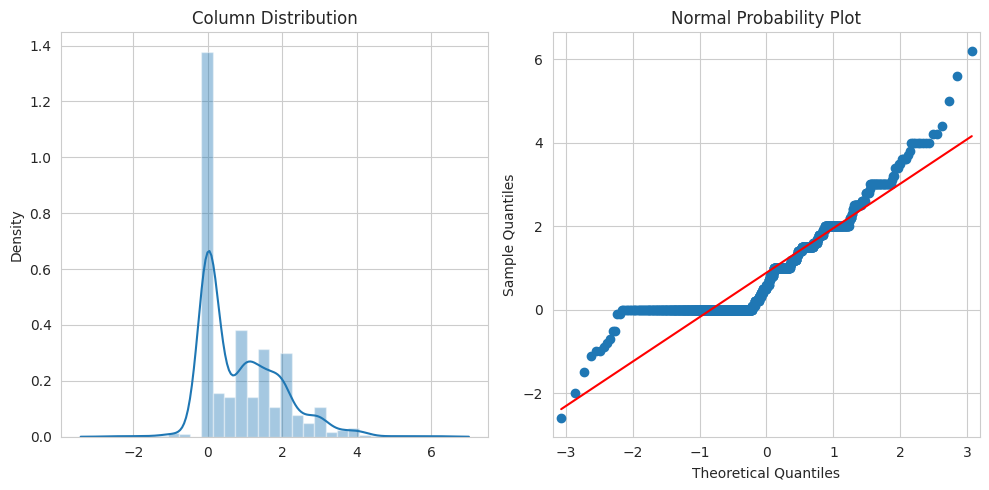

In [15]:
# 0

coplot(tabler["Oldpeak"])